# Лабораторна робота № 2. Лінійна то логістична регресії



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Завантажити дані з файлу csv в блок даних pandas (pandas.read_csv)
df = pd.read_csv("movie_metadata.csv")

In [3]:
# Навести статистику
print("Кількість записів = ", df.size, "\nКількість рядків і стовпців = ", df.shape)

Кількість записів =  141204 
Кількість рядків і стовпців =  (5043, 28)


In [4]:
# Для спрощення обрати одну категоріальну ознаку,
# інші видалити (pandas.DataFrame._get_numeric_data)
df_clean = df._get_numeric_data()
df_clean[['content_rating']] = df[['content_rating']]

In [5]:
# Замінити пропущені числові дані на середнє значення по кожному стовпцю (sklearn.impute.SimpleImputer), 
# в категоріальних - видалити сам запис (pandas.DataFrame.dropna).

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df_clean[['num_critic_for_reviews']] = imp.fit_transform(df[['num_critic_for_reviews']])
df_clean[['duration']] = imp.transform(df[['duration']])
df_clean[['num_user_for_reviews']] = imp.transform(df[['num_user_for_reviews']])
df_clean[['title_year']] = imp.transform(df[['title_year']])
df_clean[['director_facebook_likes']] = imp.transform(df[['director_facebook_likes']])
df_clean[['aspect_ratio']] = imp.transform(df[['aspect_ratio']])

df_clean.dropna(inplace = True)

In [6]:
# За наявності категоріальних даних, перетворити їх на числові (pandas.get_dummies)
df_clean = pd.get_dummies(df_clean)
df_clean.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,...,0,0,0,0,0,1,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,...,0,0,0,0,0,1,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,...,0,0,0,0,0,1,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,...,0,0,0,0,0,1,0,0,0,0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# Роздрукувати кількість рядків та стовпців даних після перетворення категоріальних даних у числові
# (pandas.DataFrame.shape)
df_clean.shape

(3828, 28)

In [8]:
# Відокремити цільовий стовпець 'imdb_score' та матрицю ознак та роздрукувати їх
X, y = df_clean.iloc[:, df_clean.columns != 'imdb_score'].values, \
       df_clean.iloc[:, df_clean.columns == 'imdb_score'].values

In [9]:
# Розділити дані на тренувальний та тестовий набір у співвідношенні 4:1, роздрукувати їх розмірність 
# (sklearn.model_selection.train_test_split)
from sklearn import model_selection

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2871, 27) (2871, 1)
(957, 27) (957, 1)


In [11]:
# Провести стандартизацію даних тренувального та тестового наборів (sklearn.preprocessing.StandardScaler)
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
# За допомогою методу головних компонент, зменшити розмірність задачі (sklearn.decomposition.PCA)
from sklearn import decomposition

pca = decomposition.PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.67309499e-01, 7.98683272e-02, 6.65990310e-02, 6.13687672e-02,
       5.00122057e-02, 4.23536972e-02, 4.14801735e-02, 3.98074097e-02,
       3.90662128e-02, 3.87744361e-02, 3.85916165e-02, 3.85092481e-02,
       3.83069146e-02, 3.78752473e-02, 3.58369822e-02, 3.44198759e-02,
       3.25751198e-02, 3.12312399e-02, 2.66604846e-02, 1.63167072e-02,
       1.45037462e-02, 1.34552574e-02, 8.46437799e-03, 6.54198827e-03,
       7.14350417e-05, 3.29959806e-32, 7.38593817e-34])

In [13]:
# Обрати довільну кількість компонент та зменшити кількість ознак відповідно
pca = decomposition.PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [15]:
# Використовуючи клас LinearRegression з sklearn.linear_model та стандартизовану тестову вибірку
# з 1 лабораторної роботи, побудувати модель лінійної регресії.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(normalize=True)
linreg.fit(X_train_std, y_train)

LinearRegression(normalize=True)

In [23]:
# Обчислити коефіцієнт детермінації для тестової та тренувальної вибірки (LinearRegression.score).
# Вказавши, що показує цей коефіцієнт і навіщо він потрібен, зробити висновки про якість моделі.
print (linreg.score(X_train_std, y_train), linreg.score(X_test_std, y_test))
# TODO висновки тут
#Коэффициент детерминации измеряет, насколько успешна аппроксимирующая функция 
#в объяснении разброса данных. В тестовой и тренировочной выборках значения
#детерминации равны 0.37... Так, как это меньше 0.5, можно говорить о плохой связи между переменными регрессионой модели и в целом плохом качестве модели.

0.3750465591498431 0.37480467418482233


In [24]:
# Роздрукуйте отримані ваги (LinearRegression.coef).
# Виведіть їх кількість та поясніть, чому їх саме стільки.
# Які висновки можна зробити, виходячи зі значень коефіцієнтів ваг?
print(linreg.coef_)
print(linreg.coef_.size)
# TODO висновки тут
# Кол-во весов совпадает с количеством параметров - 1, потому что мы выбрали 1 параметр как целевой.
# Каждый вес будет влиять на предсказанный результат, однако некоторые параметры внесут больше влияния, чем другие.

[[ 2.77323609e-01  2.32327160e-01  5.11142613e-03  1.11611941e-01
   9.88835320e-01 -8.61923049e-02  5.36152911e-01 -1.15399169e+00
  -6.14199451e-02 -2.51838223e-01 -5.30500777e-03 -1.84154694e-01
   2.74724648e-01  1.38260514e-02 -1.60268413e-02  1.87073680e-03
   1.76529639e-02  1.33226763e-15  7.38316372e-03  1.21345848e-02
   5.57530163e-02  7.63896433e-03 -9.13737066e-02 -9.93204709e-03
   5.65768728e-02  5.26927942e-02  3.93549663e-04]]
27


In [29]:
# Отримати передбачення для тестової вибірки та порівняти їх з правильними значеннями 
# LinearRegression.predict. Зробити висновки
y_test_pred = linreg.predict(X_test_std)
print(max(abs(y_test_pred - y_test)))

# TODO висновки тут
# Полученное значение можно интерпетировать как ошибку в предсказаниях. 
# Полученная модель ошиблась на 3.84... от исходных значений. 
# Это еще подкреплено значением детерминации.

[3.84447377]


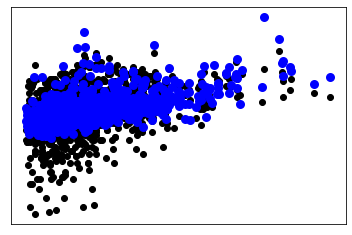

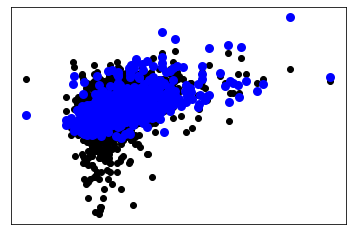

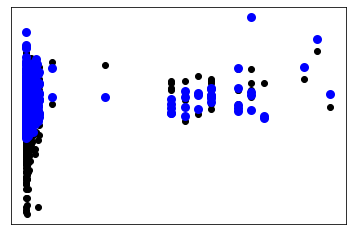

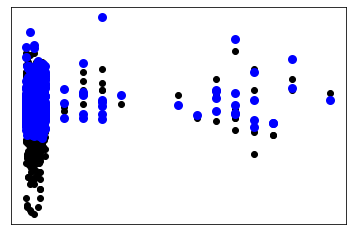

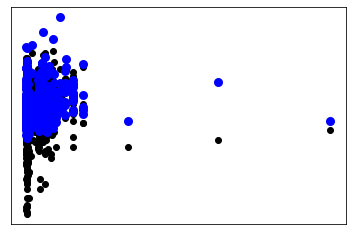

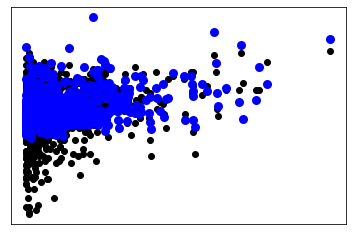

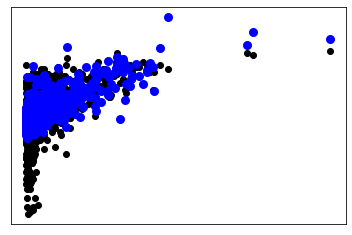

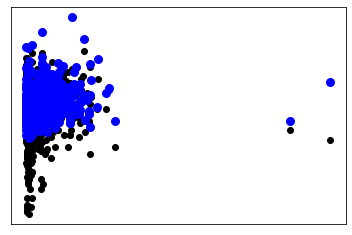

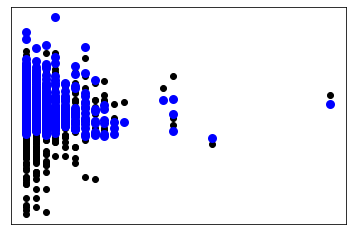

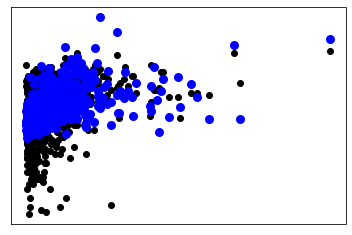

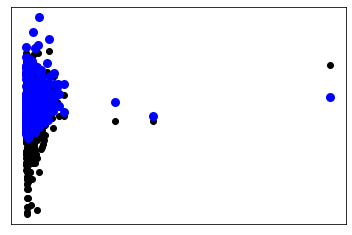

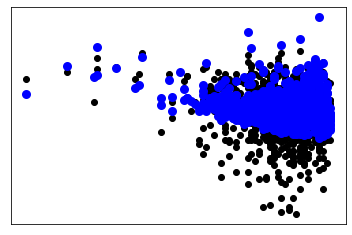

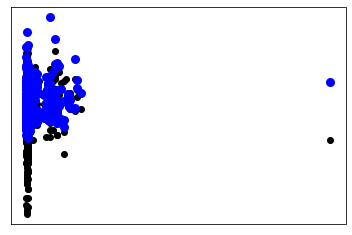

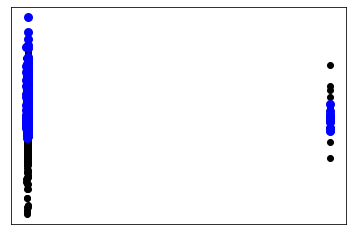

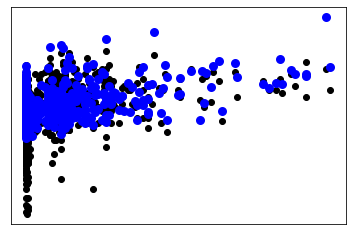

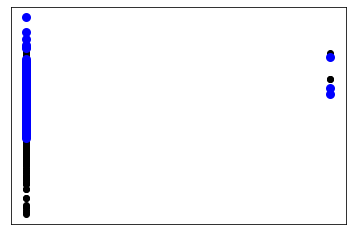

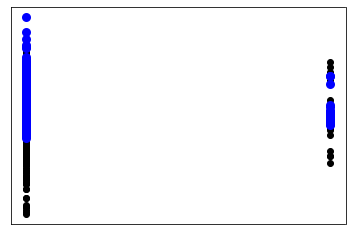

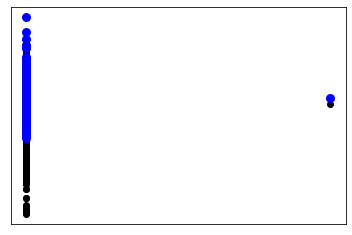

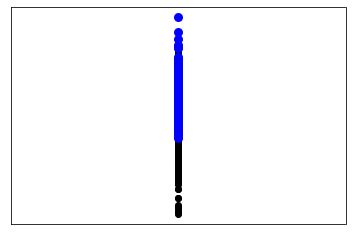

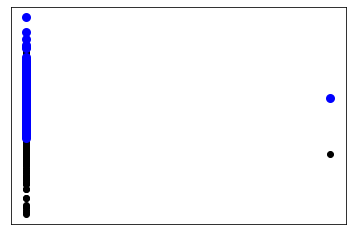

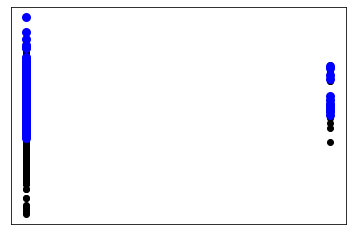

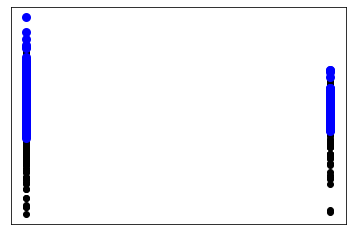

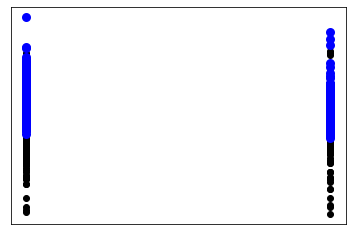

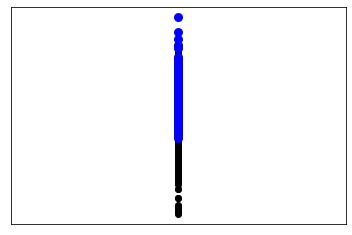

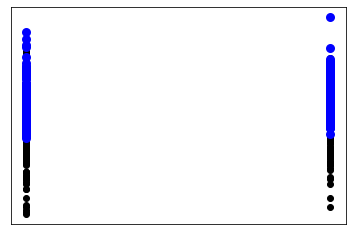

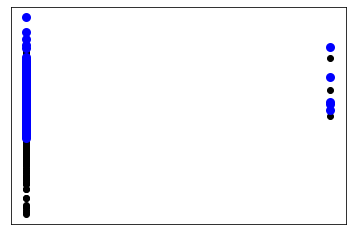

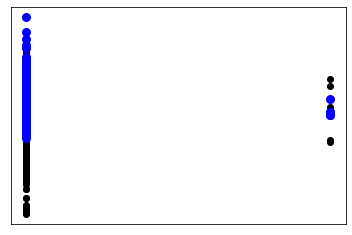

In [18]:
# Побудувати графіки, на яких буде одночасно зображено два набори точок по кожному стовпцю ознак -- 
# (стовпець тестового набору, правильне значення) та (стовпець тестового набору, передбачення).
# Опишіть отримані результати (matplotlib.pyplot.scatter).
for i in range(0, X_test_std.shape[1]):
    plt.scatter(X_test_std[:, i], y_test,  color='black')
    plt.scatter(X_test_std[:, i], y_test_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

# TODO Опишіть отримані результати тут
# Как видно из графиков ниже, достаточно большая область данных, которых наша модель не предсказала.
# Обратившись к фундаменту метода линейной регрессии, можно представить на этих графиках луч (в окружении синих точек). 
# Таким образом, можно объяснить незадетые значения. Можно выдвинуть идею, что данные связаны нелинейно, поэтому использовать линейную модель в данном случае неуместно.

In [19]:
# Повторити попередні кроки для даних, отриманих після PCA. Чи доцільно його використовувати? Поясніть чому.
linreg_pca = LinearRegression(normalize=True)
linreg_pca.fit(X_train_pca, y_train)
linreg_pca.score(X_test_pca, y_test)

0.20264593513904972

In [20]:
y_test_pca_pred = linreg_pca.predict(X_test_pca)
max(abs(y_test_pca_pred - y_test))

array([4.35067355])

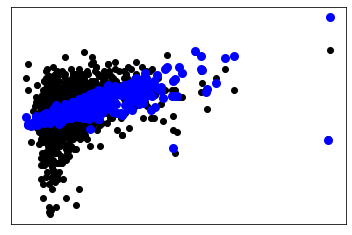

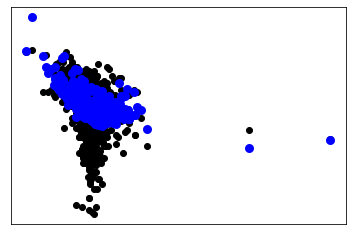

In [21]:
for i in range(0, X_test_pca.shape[1]):
    plt.scatter(X_test_pca[:, i], y_test,  color='black')
    plt.scatter(X_test_pca[:, i], y_test_pca_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

# TODO поясніть доцільність використання PCA тут
# Использовать PCA неуместно.
# Коэффициент детерминации намного хуже оного в линейной регрессии.
# Ошибка тоже увеличилась. (4.35... > 3.84...)
# На графиках виден хуже результат.